In [176]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter('ignore')

In [177]:
data = pd.read_excel(r"C:\Users\aksha\Downloads\Data_Train.xlsx")

In [178]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [179]:
data.shape

(10683, 11)

In [180]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [181]:
data.describe(include='all')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683,10683.000000
unique,12,44,5,6,128,222,1343,368,5,10,NaN
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info,NaN
freq,3849,504,4537,4537,2376,233,423,550,5625,8345,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9087.064121
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4611.359167
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5277.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8372.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12373.000000


In [182]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [183]:
data.dropna(inplace=True)

In [184]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [185]:
data.shape

(10682, 11)

In [186]:
data['Date_of_Journey']=pd.to_datetime(data['Date_of_Journey'])
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [187]:
data['Year'] = pd.DatetimeIndex(data['Date_of_Journey']).year
data['Day'] = pd.DatetimeIndex(data['Date_of_Journey']).day
data["Month"]=data["Date_of_Journey"].dt.month_name()
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Year,Day,Month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019,24,March
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2019,5,January
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,2019,6,September
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,2019,5,December
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,2019,3,January


In [188]:
data.drop('Date_of_Journey',inplace=True,axis=1)

In [189]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Year,Day,Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019,24,March
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2019,5,January
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,2019,6,September
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,2019,5,December
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,2019,3,January


In [190]:
data['Dep_Time'] = pd.to_datetime(data['Dep_Time'])
data['Dep_hour'] = pd.DatetimeIndex(data['Dep_Time']).hour
data['Dep_Minute'] = pd.DatetimeIndex(data['Dep_Time']).minute

In [191]:
data.drop('Dep_Time',inplace=True,axis=1)
data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Year,Day,Month,Dep_hour,Dep_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019,24,March,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,2019,5,January,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,2019,6,September,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,2019,5,December,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,2019,3,January,16,50


In [192]:
data['Arrival_Time'] = pd.to_datetime(data['Arrival_Time'])
data['Arrival_hour'] = pd.DatetimeIndex(data['Arrival_Time']).hour
data['Arrival_Minute'] = pd.DatetimeIndex(data['Arrival_Time']).minute

In [193]:
data.drop('Arrival_Time',inplace=True,axis=1)
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Year,Day,Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,2019,24,March,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,2019,5,January,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,2019,6,September,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,2019,5,December,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,2019,3,January,16,50,21,35


In [194]:
time = list(data['Duration'])

for i in range(len(time)):
    if len(time[i].split()) != 2:
        if 'h' in time[i]:
            time[i] = time[i] + ' 0m'
        else:
            time[i] = '0h ' + time[i]
duration_hour=[]
duration_minute=[]

for i in range(len(time)):
    duration_hour.append(int(time[i].split(sep='h')[0] ))
    duration_minute.append(int( time[i].split('m')[0].split()[-1] ))

In [195]:
data['Duration_Hour'] = duration_hour
data['Duration_Minute'] = duration_minute
data.drop('Duration',inplace=True,axis=1)
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Year,Day,Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,2019,24,March,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,2019,5,January,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,2019,6,September,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,2019,5,December,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,2019,3,January,16,50,21,35,4,45


In [196]:
data.drop('Route',inplace=True,axis=1)
data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Year,Day,Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,2019,24,March,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,No info,7662,2019,5,January,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,2019,6,September,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,2019,5,December,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,2019,3,January,16,50,21,35,4,45


In [197]:
data['Year'].unique()

array([2019], dtype=int64)

In [198]:
data.drop('Year',inplace=True,axis=1)

In [199]:
data['Month'].unique()

array(['March', 'January', 'September', 'December', 'June', 'May',
       'April'], dtype=object)

In [200]:
data.replace({'March':3 , 'January':1 , 'September':9 , 'December':12 , 'June':6 , 'May':5 , 'April':4},inplace=True)

In [201]:
data['Day'].unique()

array([24,  5,  6,  3, 27, 18, 15, 21,  4], dtype=int64)

In [202]:
data['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [203]:
data['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [204]:
data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [205]:
data.replace( { 'non-stop':0 , '1 stop':1 , '2 stops':2 , '3 stops':3 ,'4 stops':4 } ,inplace=True)

In [206]:
data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,No info,13302,3,1,16,50,21,35,4,45


In [207]:
data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [208]:
value_counts = data['Airline'].value_counts()
value_counts

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [209]:
df = pd.DataFrame({'Value': value_counts.index, 'Count': value_counts.values})
df.head()

,Value,Count
0,Jet Airways,3849
1,IndiGo,2053
2,Air India,1751
3,Multiple carriers,1196
4,SpiceJet,818


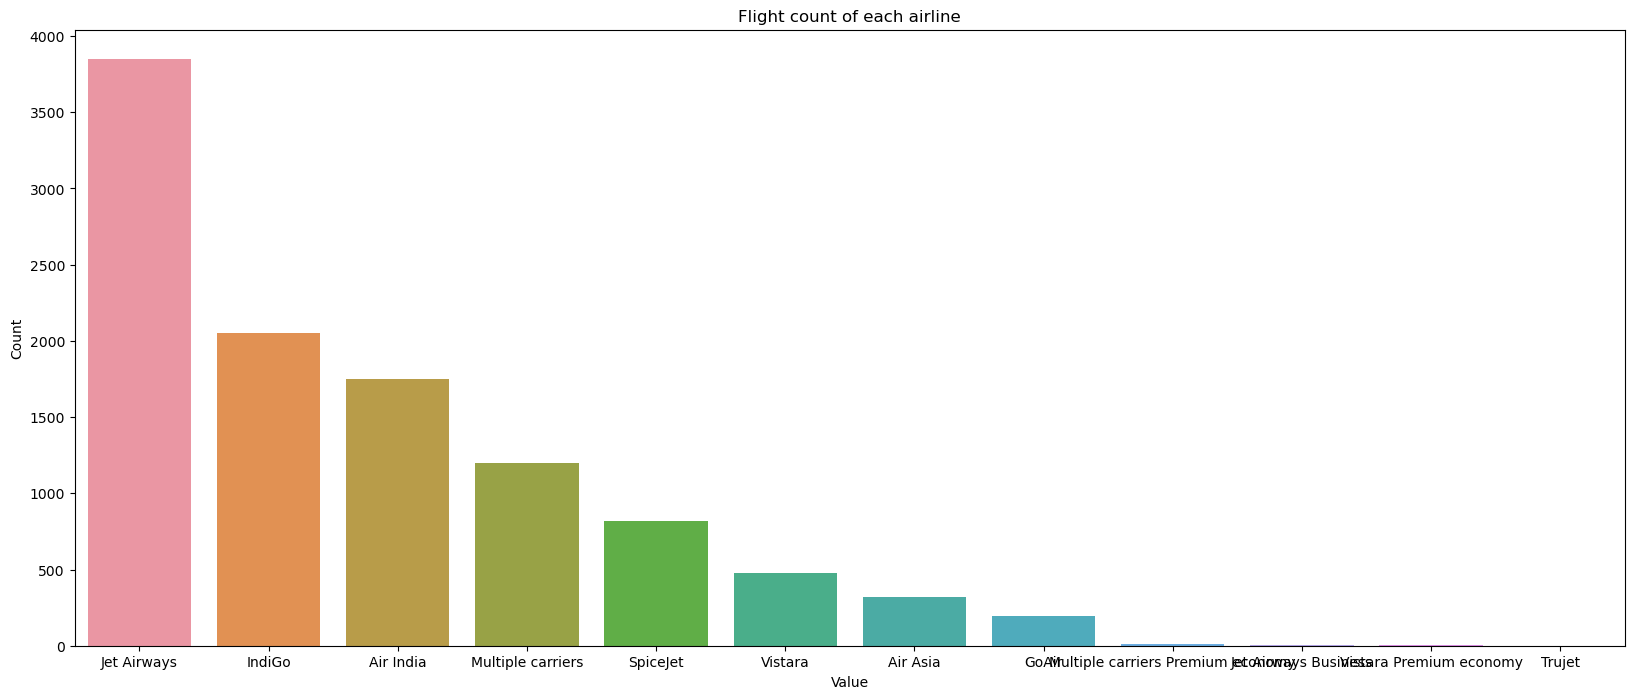

In [210]:
plt.figure(figsize=(20,8))
sns.barplot(x='Value',y='Count',data=df)
plt.title('Flight count of each airline')
plt.show()

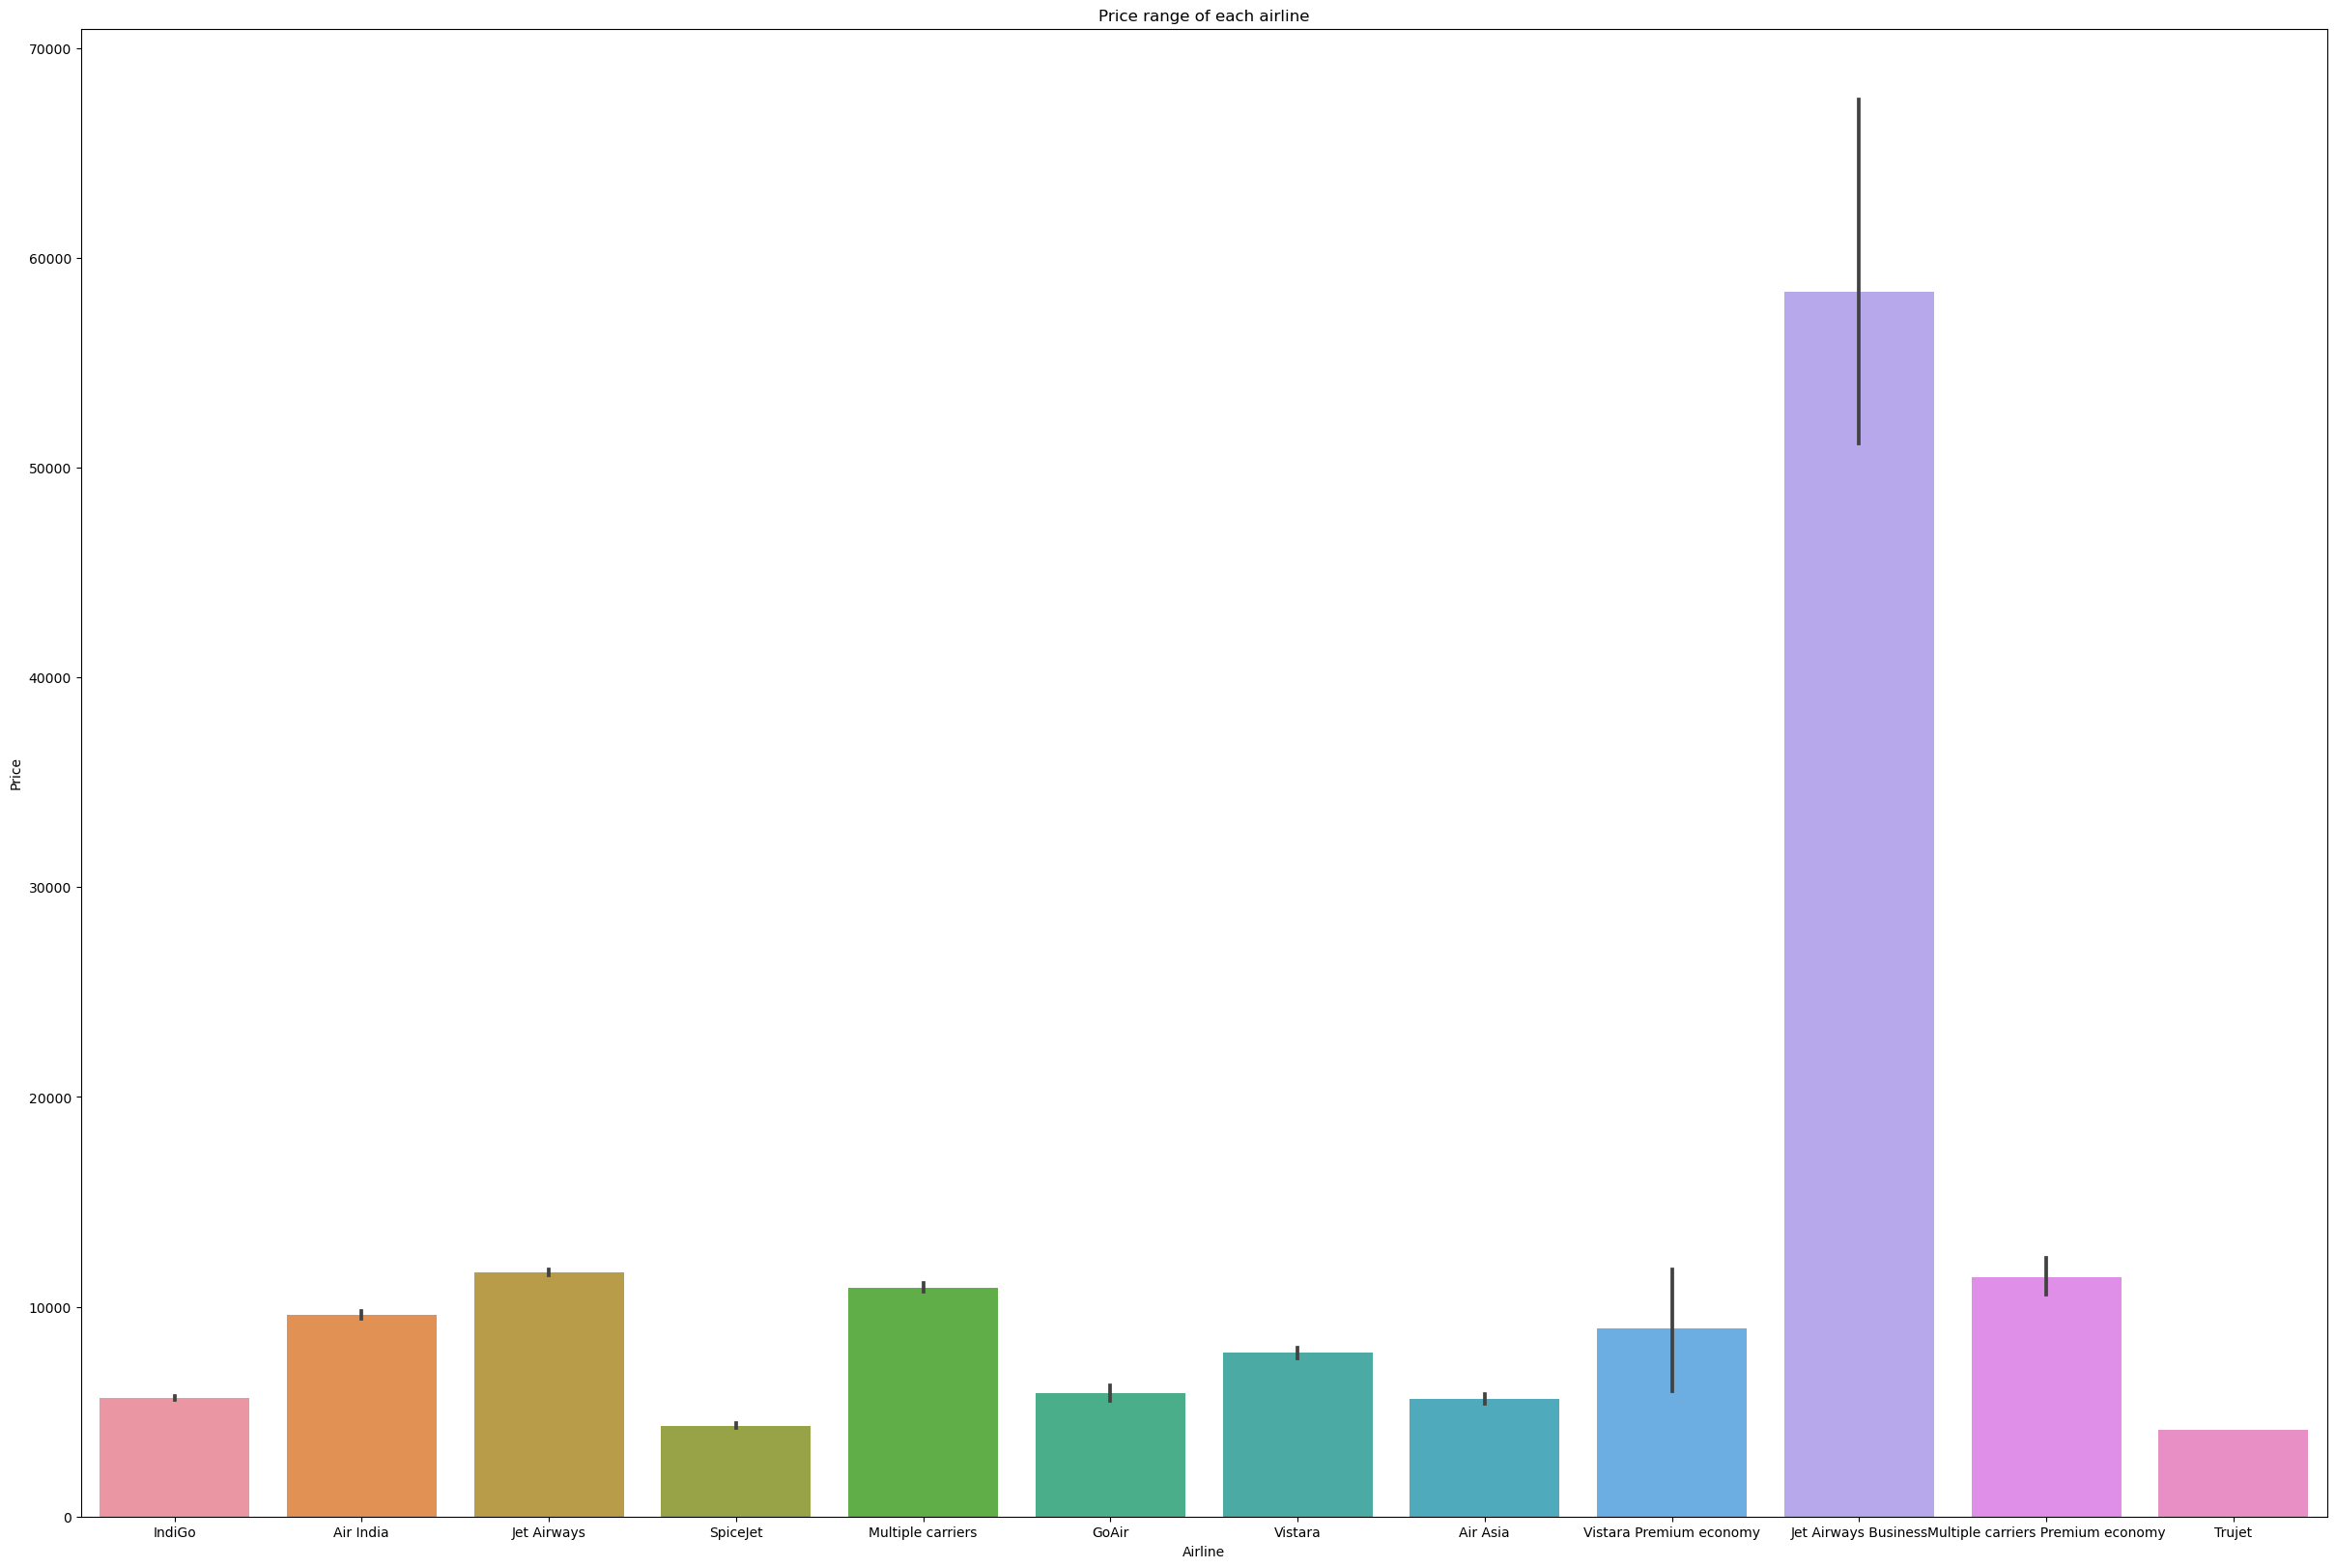

In [211]:
plt.figure(figsize=(30,20))
sns.barplot(x='Airline',y='Price',data=data)
plt.title('Price range of each airline')
plt.show()

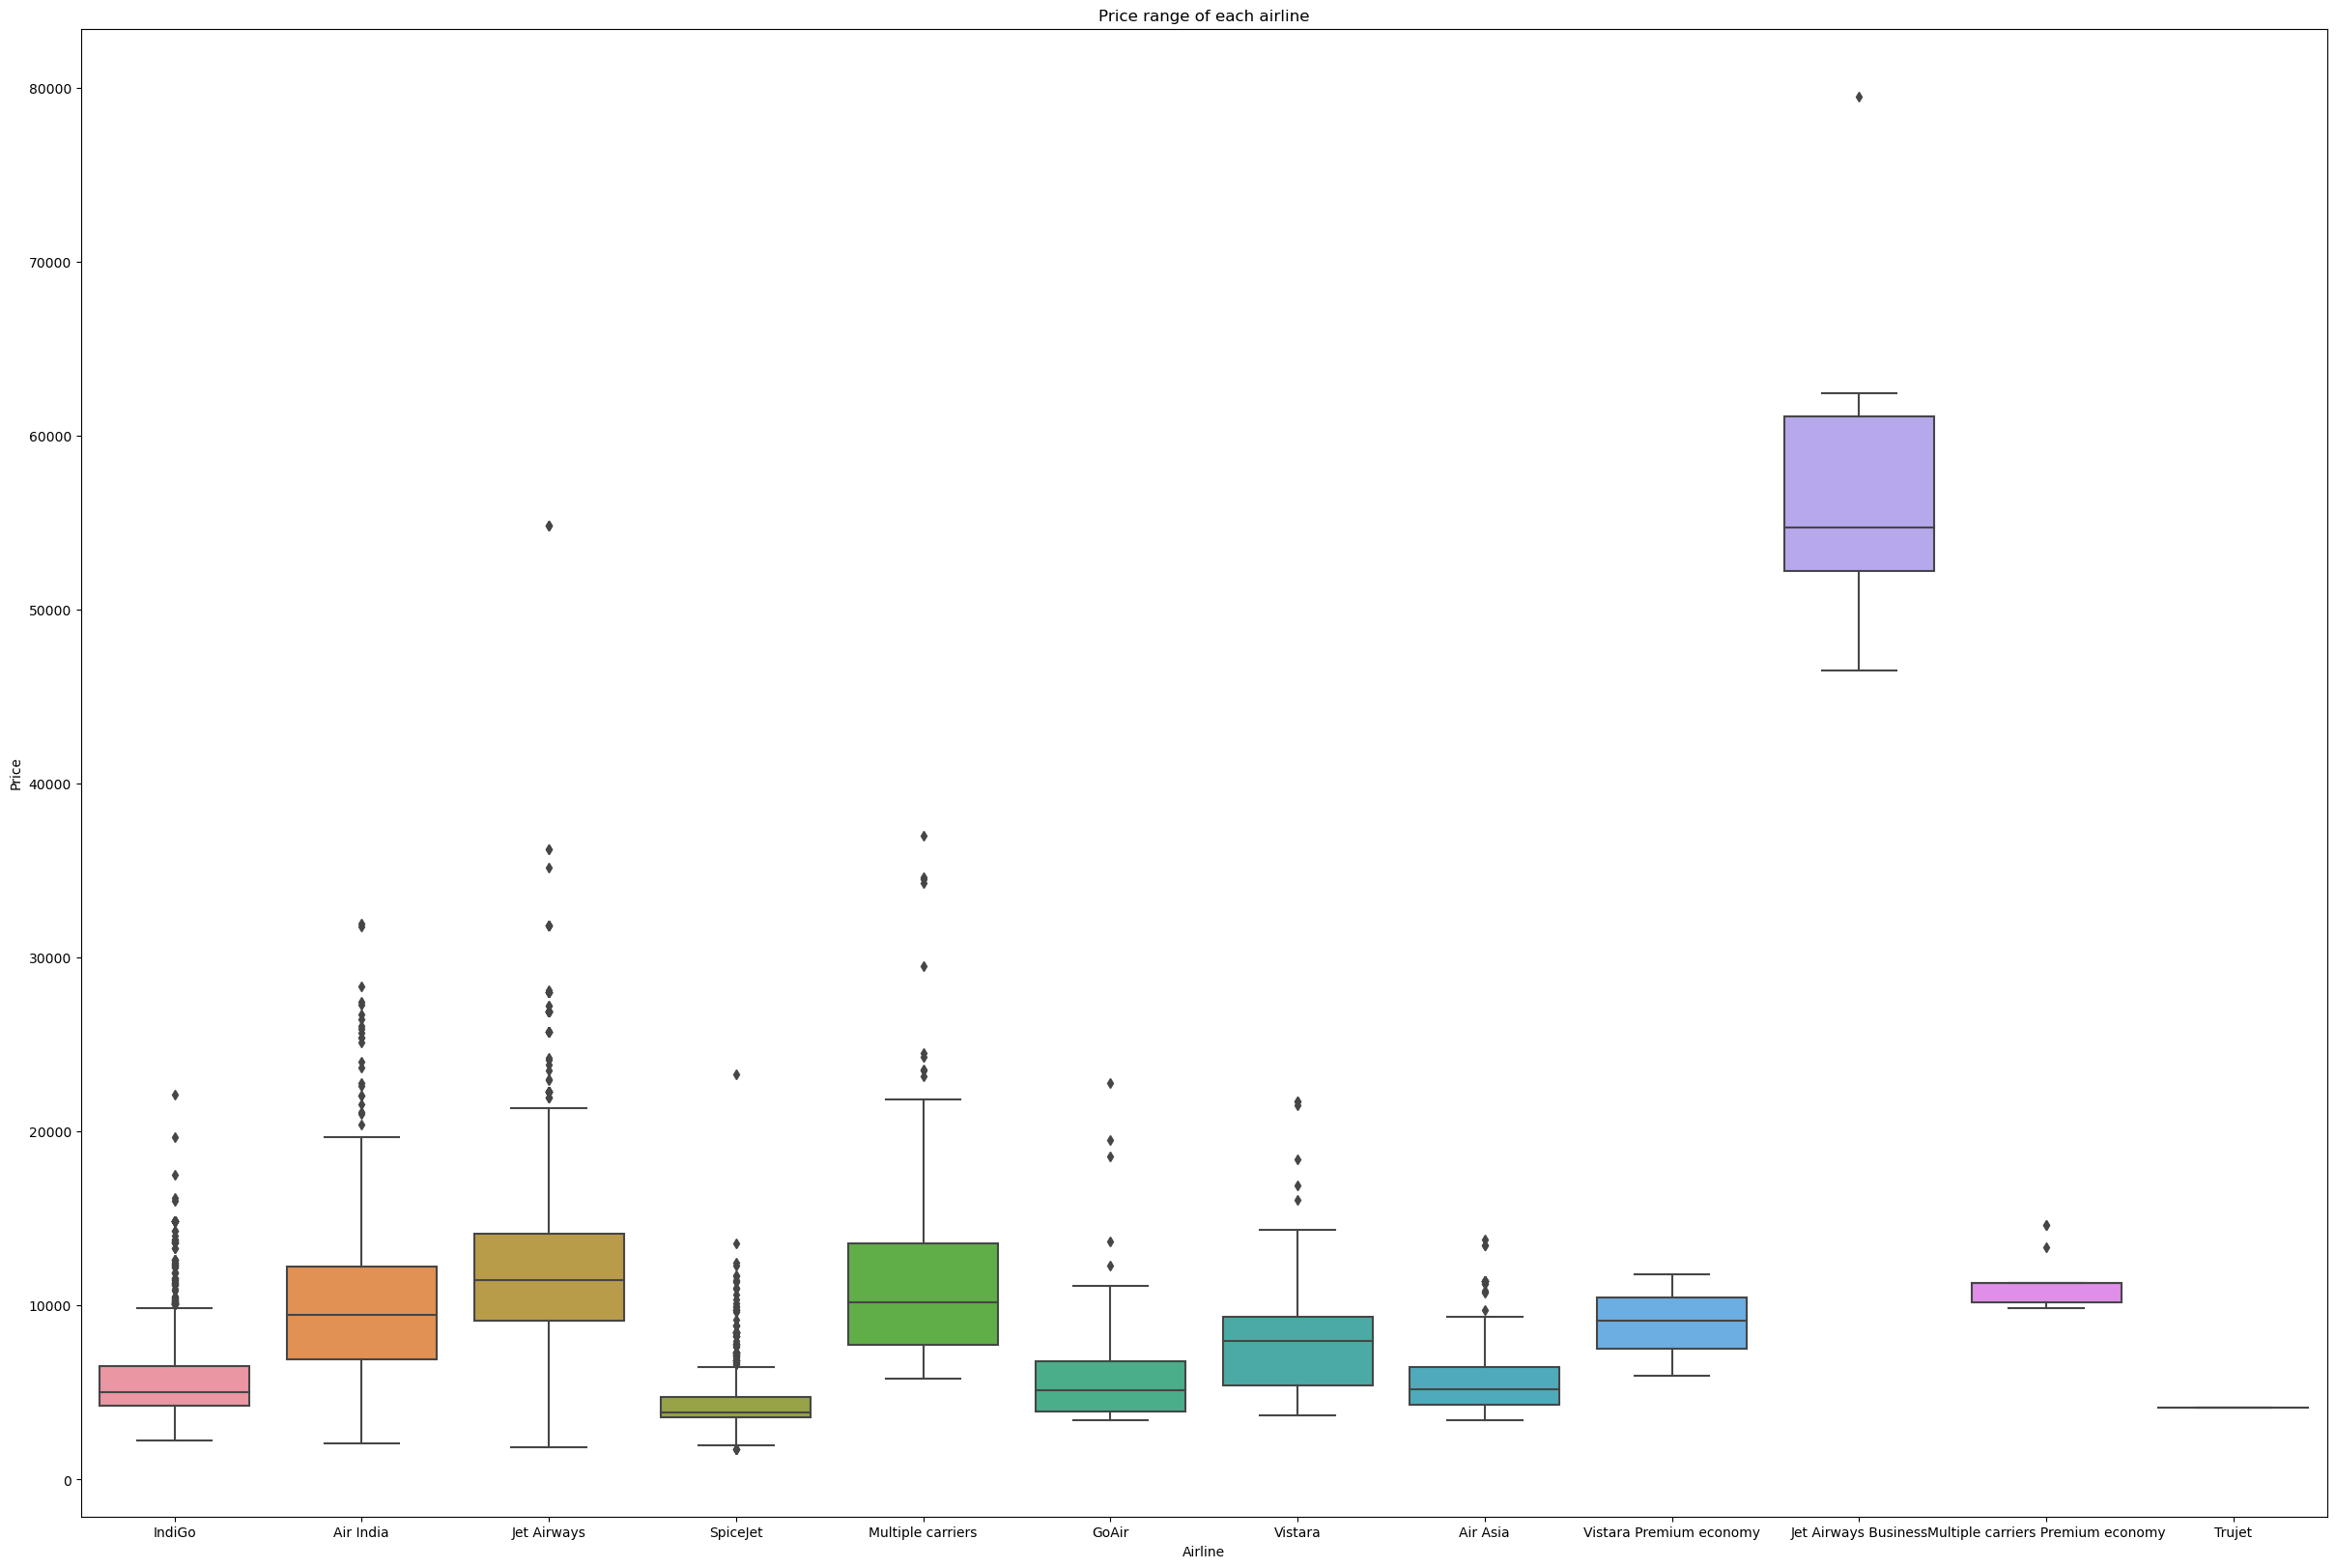

In [212]:
plt.figure(figsize=(30,20))
sns.boxplot(x='Airline',y='Price',data=data)
plt.title('Price range of each airline')
plt.show()

In [213]:
data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [214]:
value_counts = data['Source'].value_counts()
df = pd.DataFrame({'Value': value_counts.index, 'Count': value_counts.values})
df.head()

,Value,Count
0,Delhi,4536
1,Kolkata,2871
2,Banglore,2197
3,Mumbai,697
4,Chennai,381


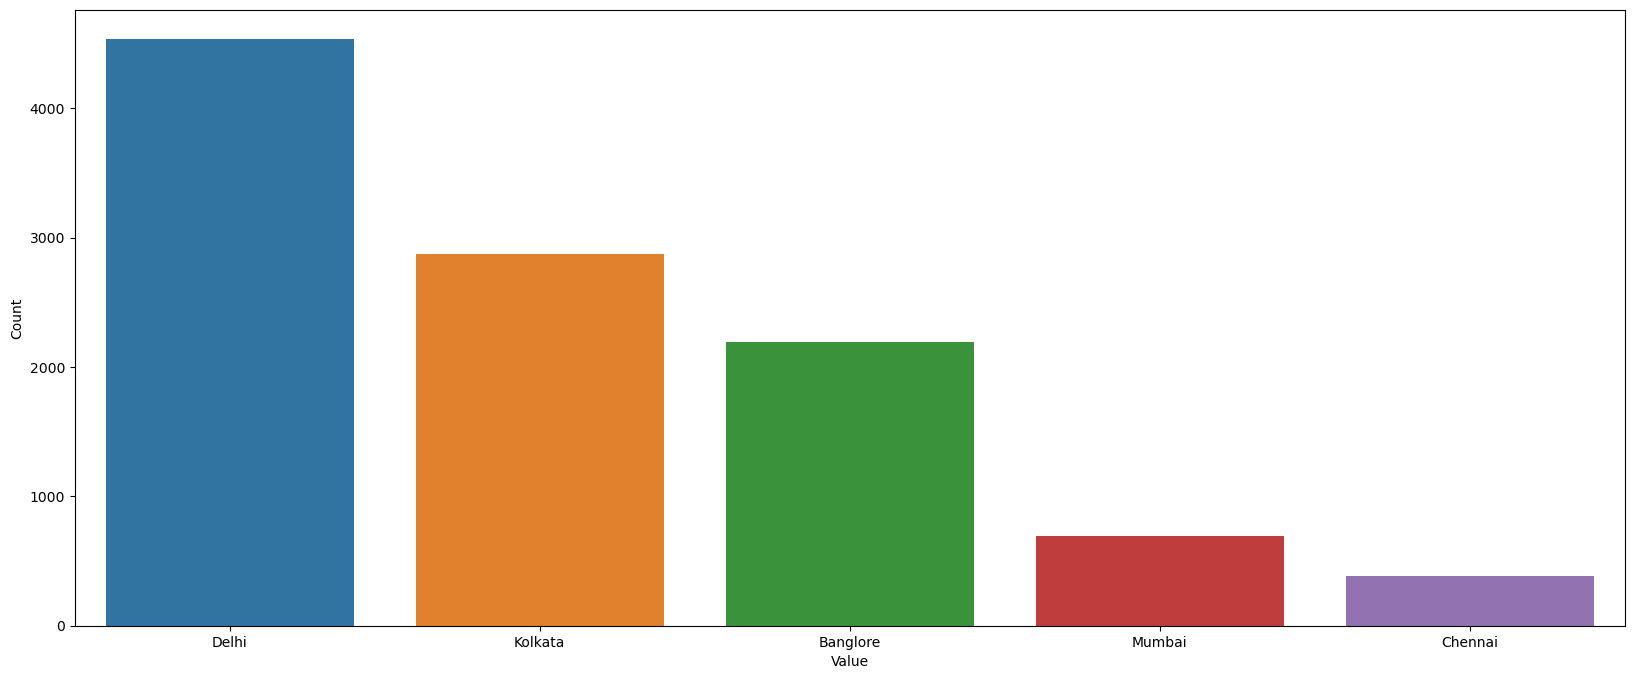

In [215]:
plt.figure(figsize=(20,8))
sns.barplot(x='Value',y='Count',data=df)
plt.show()

In [216]:
value_counts = data['Destination'].value_counts()
df = pd.DataFrame({'Value': value_counts.index, 'Count': value_counts.values})
df.head()

,Value,Count
0,Cochin,4536
1,Banglore,2871
2,Delhi,1265
3,New Delhi,932
4,Hyderabad,697


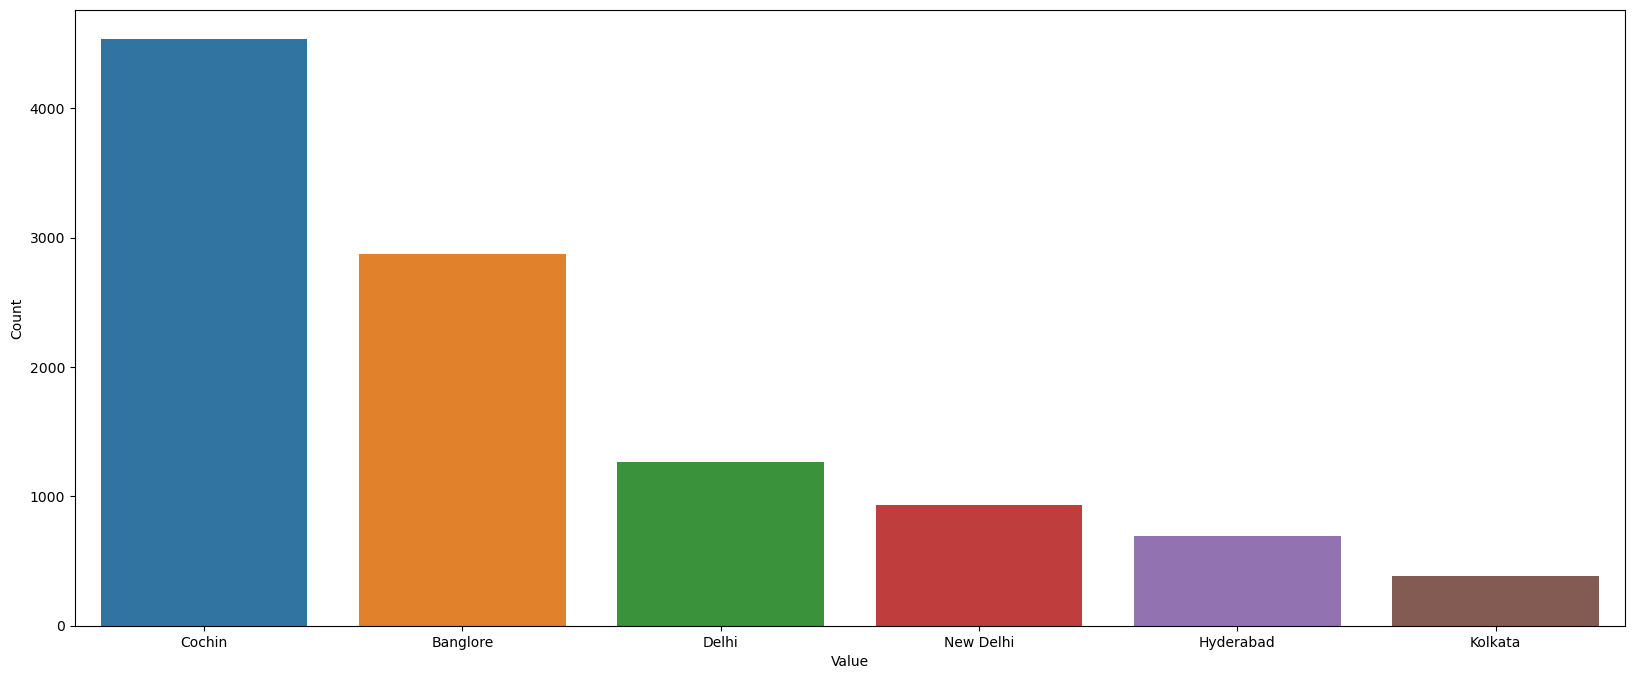

In [217]:
plt.figure(figsize=(20,8))
sns.barplot(x='Value',y='Count',data=df)
plt.show()

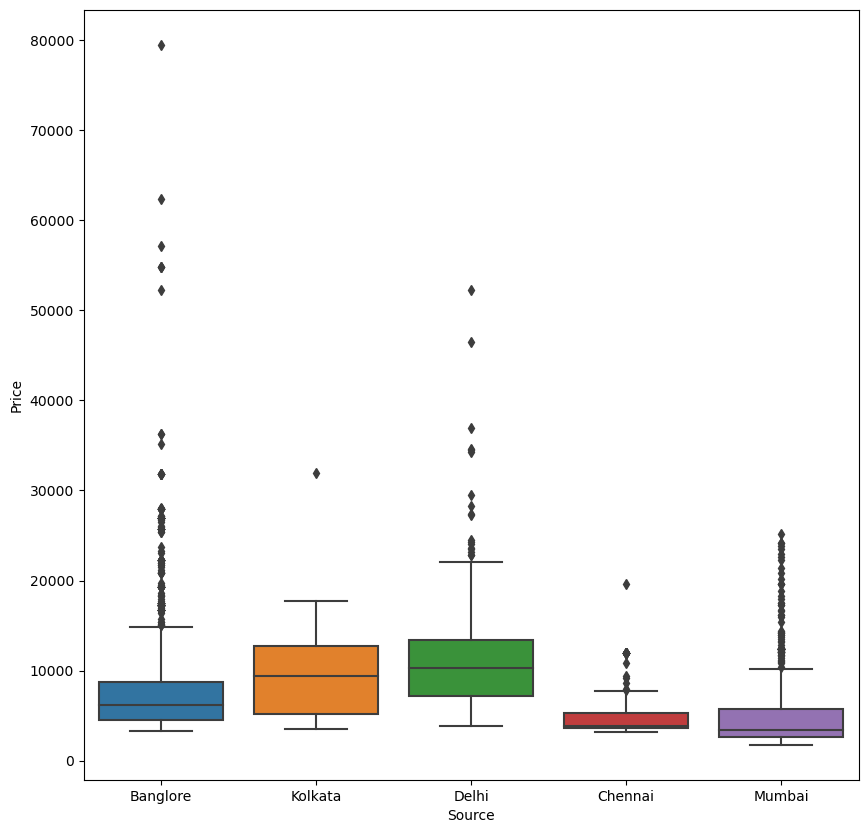

In [218]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Source',y='Price',data=data)
plt.show()

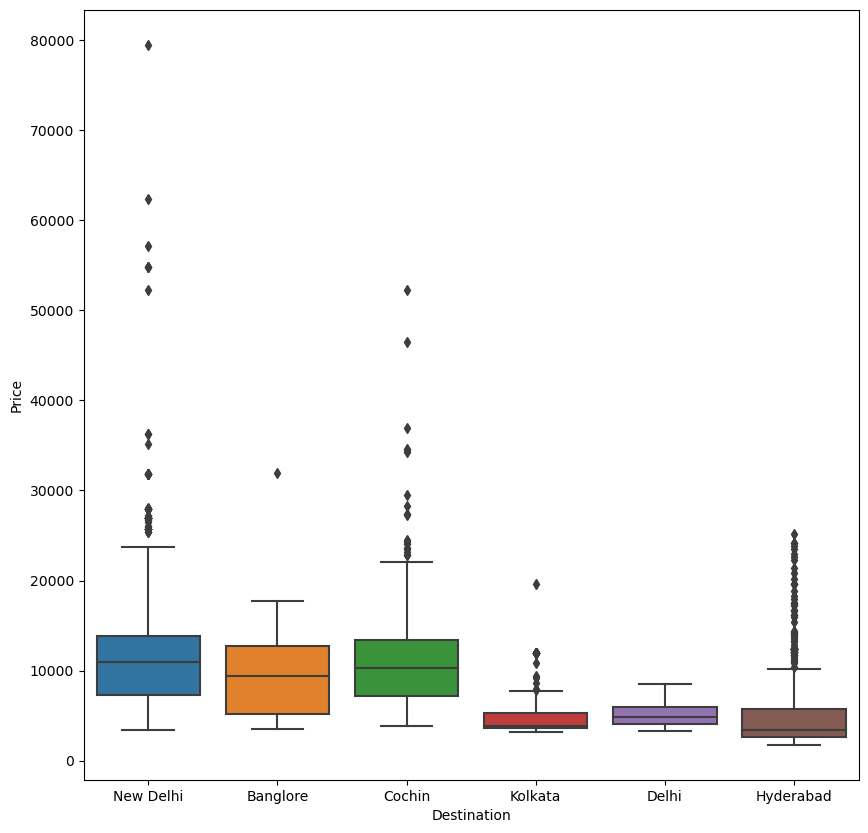

In [219]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Destination',y='Price',data=data)
plt.show()

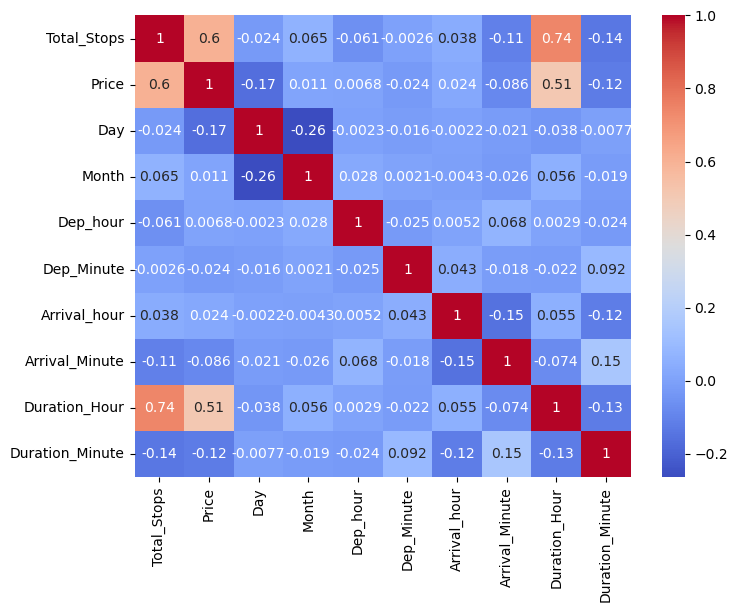

In [220]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr('pearson'),annot=True,cmap='coolwarm')
plt.show()

In [221]:
data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,No info,13302,3,1,16,50,21,35,4,45


In [222]:
x = data['Price']
x.skew()

1.812404554693161

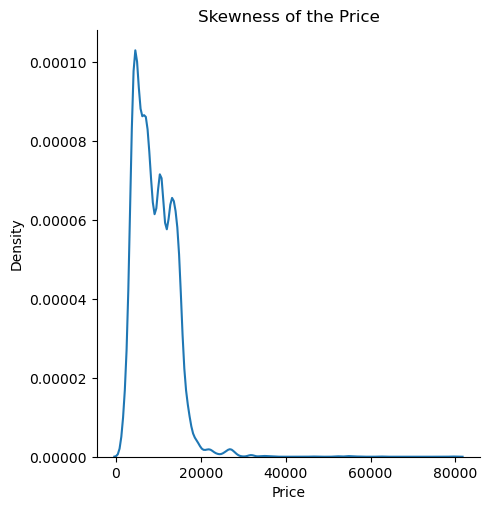

In [223]:
sns.displot(data['Price'],kind='kde')
plt.title("Skewness of the Price")
plt.show()

In [224]:
x = np.log(data['Price'])
x.skew()

-0.25476338907926027

In [225]:
x = np.sqrt(data['Price'])
x.skew()

0.43165966673613076

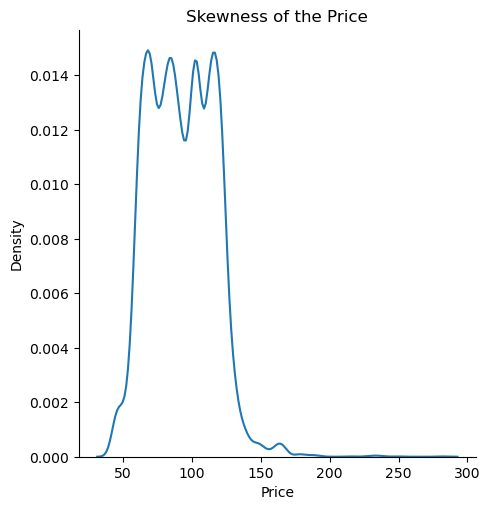

In [226]:
sns.displot(x,kind='kde')
plt.title("Skewness of the Price")
plt.show()

In [227]:
from sklearn.preprocessing import OrdinalEncoder

In [228]:
ordinal_encoder = OrdinalEncoder()
data[['Airline','Source','Destination','Additional_Info']] = ordinal_encoder.fit_transform(data[['Airline','Source','Destination','Additional_Info']])

In [229]:
data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute,Duration_Hour,Duration_Minute
0,3.0,0.0,5.0,0,8.0,3897,24,3,22,20,1,10,2,50
1,1.0,3.0,0.0,2,8.0,7662,5,1,5,50,13,15,7,25
2,4.0,2.0,1.0,2,8.0,13882,6,9,9,25,4,25,19,0
3,3.0,3.0,0.0,1,8.0,6218,5,12,18,5,23,30,5,25
4,3.0,0.0,5.0,1,8.0,13302,3,1,16,50,21,35,4,45


In [230]:
X = pd.concat([data.iloc[:,:5],data.iloc[:,6:]],axis=1)
y = data.iloc[:,5:6]

In [231]:
X

,Airline,Source,Destination,Total_Stops,Additional_Info,Day,Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute,Duration_Hour,Duration_Minute
0,3.0,0.0,5.0,0,8.0,24,3,22,20,1,10,2,50
1,1.0,3.0,0.0,2,8.0,5,1,5,50,13,15,7,25
2,4.0,2.0,1.0,2,8.0,6,9,9,25,4,25,19,0
3,3.0,3.0,0.0,1,8.0,5,12,18,5,23,30,5,25
4,3.0,0.0,5.0,1,8.0,3,1,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0.0,3.0,0.0,0,8.0,4,9,19,55,22,25,2,30
10679,1.0,3.0,0.0,0,8.0,27,4,20,45,23,20,2,35
10680,4.0,0.0,2.0,0,8.0,27,4,8,20,11,20,3,0
10681,10.0,0.0,5.0,0,8.0,3,1,11,30,14,10,2,40


In [232]:
y

,Price
0,3897
1,7662
2,13882
3,6218
4,13302
...,...
10678,4107
10679,4145
10680,7229
10681,12648


In [233]:
from sklearn.preprocessing import StandardScaler

In [234]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [235]:
X

array([[-0.41080484, -1.65835945,  2.41653414, ..., -0.8900139 ,
        -0.97061397,  1.27904078],
       [-1.26115217,  0.89001433, -0.97381203, ..., -0.5870944 ,
        -0.38199906, -0.19631866],
       [ 0.01436882,  0.04055641, -0.2957428 , ...,  0.0187446 ,
         1.03067671, -1.67167809],
       ...,
       [ 0.01436882, -1.65835945,  0.38232644, ..., -0.2841749 ,
        -0.85289099, -1.67167809],
       [ 2.56541078, -1.65835945,  2.41653414, ..., -0.8900139 ,
        -0.97061397,  0.688897  ],
       [-1.26115217,  0.04055641, -0.2957428 , ..., -0.5870944 ,
        -0.26427608, -0.49139054]])

In [236]:
X.shape

(10682, 13)

In [237]:
y = np.array(y)

In [238]:
y

array([[ 3897],
       [ 7662],
       [13882],
       ...,
       [ 7229],
       [12648],
       [11753]], dtype=int64)

In [239]:
y.shape

(10682, 1)

In [240]:
from sklearn.model_selection import train_test_split as tts

In [241]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.25, random_state=0)

In [242]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

In [243]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [244]:
predicted_values = train_pred
actual_values = y_train

mae = mean_absolute_error(actual_values, predicted_values)
mse = mean_squared_error(actual_values, predicted_values)
rmse = np.sqrt(mse)
r2 = r2_score(actual_values, predicted_values)

print("The efficiency metrics of the LinearRegression model on training set:")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)


The efficiency metrics of the LinearRegression model on training set:
Mean Absolute Error (MAE): 2444.642205512444
Mean Squared Error (MSE): 11884439.877532441
Root Mean Squared Error (RMSE): 3447.3815973188175
R-squared (R²): 0.429477835683


In [245]:
predicted_values = test_pred
actual_values = y_test

mae = mean_absolute_error(actual_values, predicted_values)
mse = mean_squared_error(actual_values, predicted_values)
rmse = np.sqrt(mse)
r2 = r2_score(actual_values, predicted_values)

print("The efficiency metrics of the LinearRegression model on testing set:")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

The efficiency metrics of the LinearRegression model on testing set:
Mean Absolute Error (MAE): 2516.3555682380425
Mean Squared Error (MSE): 13042663.573943807
Root Mean Squared Error (RMSE): 3611.462802514212
R-squared (R²): 0.42184965563096444


In [246]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train , y_train)
train_pred = rfr.predict(X_train)
test_pred = rfr.predict(X_test)

In [247]:
predicted_values = train_pred
actual_values = y_train

mae = mean_absolute_error(actual_values, predicted_values)
mse = mean_squared_error(actual_values, predicted_values)
rmse = np.sqrt(mse)
r2 = r2_score(actual_values, predicted_values)

print("The efficiency metrics of the LinearRegression model on training set:")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)


The efficiency metrics of the LinearRegression model on training set:
Mean Absolute Error (MAE): 269.7459787246901
Mean Squared Error (MSE): 395472.2944899487
Root Mean Squared Error (RMSE): 628.8658795720664
R-squared (R²): 0.9810150321172173


In [248]:
predicted_values = test_pred
actual_values = y_test

mae = mean_absolute_error(actual_values, predicted_values)
mse = mean_squared_error(actual_values, predicted_values)
rmse = np.sqrt(mse)
r2 = r2_score(actual_values, predicted_values)

print("The efficiency metrics of the LinearRegression model on testing set:")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

The efficiency metrics of the LinearRegression model on testing set:
Mean Absolute Error (MAE): 748.6325344380858
Mean Squared Error (MSE): 3179859.1740214713
Root Mean Squared Error (RMSE): 1783.2159639318709
R-squared (R²): 0.8590443841411107


In [249]:
import pickle
file = open('model.pkl','wb')
pickle.dump(rfr,file)

In [250]:
model = open('model.pkl','rb')
mod = pickle.load(model)

In [251]:
predicted_data = mod.predict(X_test)

In [252]:
r2_score(y_test,predicted_data)

0.8590443841411107